In [1]:
import yfinance as yf
import pandas as pd
import os

**Load sp500.csv**

In [24]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [25]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-02 00:00:00-05:00,6830.959961,6851.549805,6806.709961,6829.370117,4582290000,0.0,0.0
2025-12-03 00:00:00-05:00,6815.290039,6862.419922,6810.430176,6849.720215,4736780000,0.0,0.0
2025-12-04 00:00:00-05:00,6866.470215,6866.470215,6827.120117,6857.120117,4872440000,0.0,0.0


**Take away the time from the end of Date**

In [28]:
sp500.index = sp500.index.tz_localize(None).normalize()

In [30]:
sp500.index

DatetimeIndex(['1927-12-30', '1928-01-03', '1928-01-04', '1928-01-05',
               '1928-01-06', '1928-01-09', '1928-01-10', '1928-01-11',
               '1928-01-12', '1928-01-13',
               ...
               '2025-11-24', '2025-11-25', '2025-11-26', '2025-11-28',
               '2025-12-01', '2025-12-02', '2025-12-03', '2025-12-04',
               '2025-12-05', '2025-12-08'],
              dtype='datetime64[ns]', name='Date', length=24601, freq=None)

**Cleaning and Visualizing The Data**

SP500 Price History Chart

<Axes: xlabel='Date'>

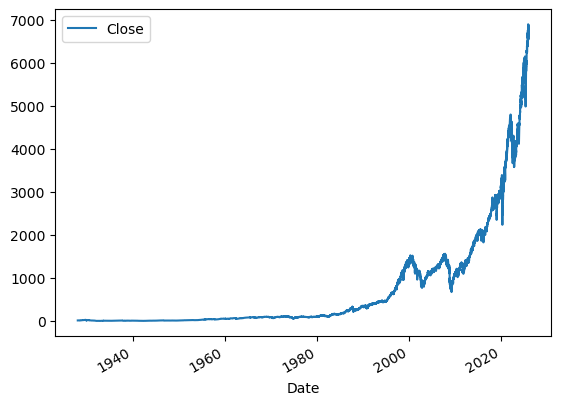

In [31]:
sp500.plot.line(y="Close", use_index=True)

Remove dividends and stock splits to clean data

In [33]:
del sp500["Dividends"]
del sp500["Stock Splits"]

Making a tomorrow column to predict the price

In [34]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [35]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-12-02,6830.959961,6851.549805,6806.709961,6829.370117,4582290000,6849.720215
2025-12-03,6815.290039,6862.419922,6810.430176,6849.720215,4736780000,6857.120117
2025-12-04,6866.470215,6866.470215,6827.120117,6857.120117,4872440000,6870.399902


Shows if the price went up or down for prediction purposes

In [38]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [39]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-12-02,6830.959961,6851.549805,6806.709961,6829.370117,4582290000,6849.720215,1
2025-12-03,6815.290039,6862.419922,6810.430176,6849.720215,4736780000,6857.120117,1
2025-12-04,6866.470215,6866.470215,6827.120117,6857.120117,4872440000,6870.399902,1


Removes all data before 1990

In [40]:
sp500 = sp500.loc["1990-01-01":].copy()

In [41]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-12-02,6830.959961,6851.549805,6806.709961,6829.370117,4582290000,6849.720215,1
2025-12-03,6815.290039,6862.419922,6810.430176,6849.720215,4736780000,6857.120117,1
2025-12-04,6866.470215,6866.470215,6827.120117,6857.120117,4872440000,6870.399902,1


Train the inital model using RandomForestClassifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

Close ratio shows momentum from specific set of days ago
Trend shows specific days sum of closing prices

In [123]:
sp500["Close_Ratio_2"] = (sp500["Close"] / sp500["Close"].shift(1))
sp500["Close_Ratio_5"] = (sp500["Close"] / sp500["Close"].shift(5))
sp500["Close_Ratio_60"] = (sp500["Close"] / sp500["Close"].shift(60))
sp500["Close_Ratio_250"] = (sp500["Close"] / sp500["Close"].shift(250))
sp500["Trend_2"] = (sp500["Close"].shift(1).rolling(2).sum())
sp500["Trend_5"] = (sp500["Close"].shift(1).rolling(5).sum())
sp500["Trend_30"] = (sp500["Close"].shift(1).rolling(30).sum())

sp500 = sp500.dropna()

In [124]:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]

In [125]:
predictors = ["Close_Ratio_2", "Close_Ratio_5", "Close_Ratio_60", "Close_Ratio_250", "Trend_2", "Trend_5", "Trend_30"]

In [126]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [127]:
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

Measure the model

In [128]:
from sklearn.metrics import precision_score

What percentage of the time did the market actually go up

In [132]:
preds = model.predict(test[predictors])

In [133]:
preds = pd.Series(preds, index=test.index)

In [134]:
preds

Date
2025-07-17    0
2025-07-18    1
2025-07-21    0
2025-07-22    0
2025-07-23    0
             ..
2025-12-01    1
2025-12-02    0
2025-12-03    0
2025-12-04    0
2025-12-05    0
Length: 100, dtype: int64

In [135]:
precision_score(test["Target"], preds)

0.6666666666666666

In [136]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

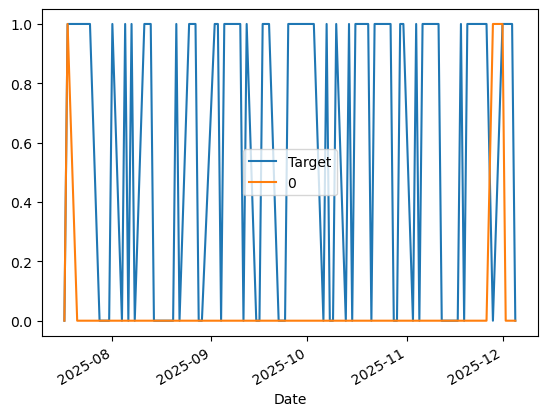

In [137]:
combined.plot()

Backtesting

In [138]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [139]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [140]:
predictions = backtest(sp500, model, predictors)

In [142]:
predictions["Predictions"].value_counts()

Predictions
0    2968
1    2832
Name: count, dtype: int64

In [144]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5526129943502824

Across about 6000 trading days it was 55% accurate the market would go up

In [145]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.546034
0    0.453966
Name: count, dtype: float64

Algorithmn preformed slightly better than the actual model

Update the model to test again

In [169]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

- Predict_proba returns a probability the stock will go up or down
- Returns the price will go up if there's a chance greater than 60%
- Reduces days it predicts price will go up but increases the chance the price goes up on those days

In [170]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [171]:
predictions = backtest(sp500, model, predictors)

Shows fewer days where the model is more confident

In [172]:
predictions["Predictions"].value_counts()

Predictions
0.0    5054
1.0     746
Name: count, dtype: int64

In [173]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5428954423592494